<a href="https://colab.research.google.com/github/tuncayyaylali/my_projects/blob/main/first_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First Speech of American President's**\
Çalışma kapsamında son iki Amerikan Başkanı Joe BIDEN ve Donal TRUMP' ın seçim zaferi konuşmaları doğal dil işleme yöntemleriyle analiz edilmiş ve bu konuşmalarda en çok kullandıkları kelimeler WordCloud yöntemiyle görselleştirilmiştir.

**Library and Settings**

In [ ]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

**Text Pre-Processing and Text Visualization**

In [ ]:
from numpy.core.numeric import NaN
def word_cloud(dataset, target_clmn, thresh_hold, bar_graphic=True, word_cloud=True, mx_fnt_sz=50, mx_wrds=100, \
               back_color="black"):
    '''

    Args:
        dataset:
            dataframe
        target_clmn:
            Metin işleme işleminin gerçekleştirileceği kolon ismidir.
        thresh_hold:
            Rarewords için eşik değerdir.
        bar_graphic:
            Bar grafiğin çizdirilip çizidirilmeyeceğini belirler.
        word_cloud:
            Word Cloud şeklinin çizdirilip çizidirilmeyeceğini belirler.
        mx_fnt_sz:
            Word Cloud şeklindeki maksimum font boyutudur.
        mx_wrds:
            Word Cloud şeklinde yer alması istenen maksimum kelime sayısıdır.
        back_color:
            Word Cloud şeklindeki arka plan rengidir.

    Returns:
        Seçilen parametrelere göre ekrana bar grafiği ve word cloud şekli çizdirir.

    '''
    dataset[target_clmn] = dataset[target_clmn].str.lower()
    dataset[target_clmn] = dataset[target_clmn].str.replace('[^\w\s]', '')
    dataset[target_clmn] = dataset[target_clmn].str.replace('\d', '')
    sw = stopwords.words('english')
    dataset[target_clmn] = dataset[target_clmn].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
    temp_dataset = pd.Series(' '.join(dataset[target_clmn]).split()).value_counts()
    drops = temp_dataset[temp_dataset <= thresh_hold]
    dataset[target_clmn] = dataset[target_clmn].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
    dataset[target_clmn].apply(lambda x: TextBlob(x).words)
    tf = dataset[target_clmn].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
    tf.columns = ["words", "tf"]
    tf.dropna(axis=0)
    if bar_graphic:
        tf[(tf["words"] != '') & (tf["tf"] > thresh_hold)].sort_values(by="tf",ascending=False).plot.bar(x="words", y="tf")        
        plt.show()
    if word_cloud:
        text = " ".join(i for i in dataset[target_clmn])
        wordcloud = WordCloud(max_font_size=mx_fnt_sz,
                              max_words=mx_wrds,
                              background_color=back_color).generate(text)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

**Dataset**

In [ ]:
df_biden = pd.read_excel("/content/drive/MyDrive/Kişisel Dosyalar/biden.xlsx")
df_trump = pd.read_excel("/content/drive/MyDrive/Kişisel Dosyalar/trump.xlsx")
print(f"Biden' s Speech:\n {df_biden.head(3)}\n")
print(f"Trump' s Speech:\n {df_trump.head(3)}\n")

Biden' s Speech:
                                               record
0  My fellow Americans, the people of this nation...
1  They have delivered us a clear victory. A conv...
2                     A victory for “We the People.”

Trump' s Speech:
                                               record
0  Thank you. Thank you very much, everybody. Sor...
1  I've just received a call from Secretary Clint...
2  I mean, she fought very hard. Hillary has work...



**WordCloud for Biden' s Speech**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: The default value of regex will change from True to False in a future version.


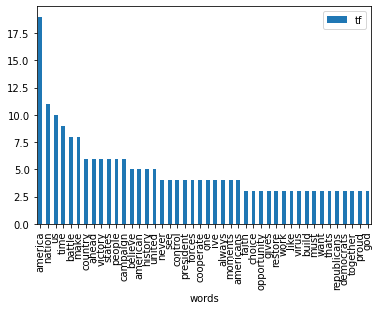

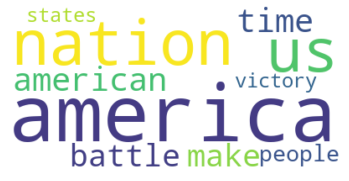

In [ ]:
word_cloud(df_biden, "record", 2, True, True, 100, 10, "white")

**WordCloud for Trump' s Speech**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: The default value of regex will change from True to False in a future version.


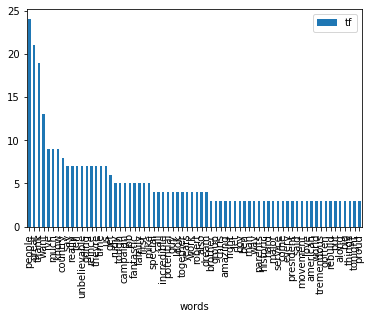

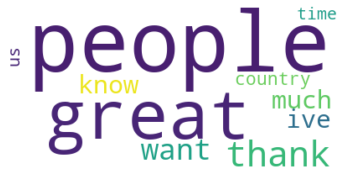

In [ ]:
word_cloud(df_trump, "record", 2, True, True, 100, 10, "white")

**Sonuç ve Değerlendirme**\
Biden' ın konuşmasında en çok geçen 3 kelime "America", "nation" ve "us" olup Trump' ın konuşmasında ise "people", "great" ve "thank" kelimeleridir. Bu sonuçlara bakarak Biden' ın daha çok Amerika' yı öne çıkaran toplum odaklı bir dil kullandığı Trump' ın ise daha çok insan odaklı bir dil kullandığı yargısına varılmıştır. 